<a href="https://colab.research.google.com/github/Virtual32PRO/machine_learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab2: Regresja liniowa

### Spis treści:
1. [Import bibliotek i wizualizacja danych ](#0)
2. [Regresja liniowa jednej zmiennej](#1)
    - 2.1. [Implementacja funkcji liniowej, kalkulatora kosztów, obranie parametrów sterujących](#1-1)
    - 2.2. [Implementacja algorytmu gradientu prostego](#1-2)
    - 2.3. [Policzenie optymalnych parametrów dla regresji liniowej oraz współczynnika kosztu dla tych parametrów](#1-3)
    - 2.4. [Wizualizacja zoptymalizowanych parametrów regresji liniowej](#1-4)
3. [Regresja liniowa wielu zmiennych](#2)
    - 3.1. [Dostosowanie parametrów do operacji macierzowych](#2-1)
    - 3.2. [Dostosowanie implementacji funkcji liniowej, kalkulatora kosztów, algorytmu gradientu prostego do postaci wielowymiarowej regresji liniowej](#2-2)
    - 3.3. [Policzenie optymalnych parametrów dla regresji liniowej oraz współczynnika kosztu dla tych parametrów](#2-3)
    - 3.4. [Wizualizacja zoptymalizowanych parametrów regresji liniowej](#2-4)
4. [Optymalizacja modelu regresji liniowej wielu zmiennych](#3)
    - 4.1. [Pobranie danych z pliku housing.txt](#3-1)
    - 4.2. [Standaryzacja zmiennych numerycznych](#3-2)
    - 4.3. [Predykcja kosztu mieszkania 4 pokojowego o powierzchni 1300 $ m^2 $](#3-3)
5. [Optymalizacja modelu regresji liniowej wielu zmiennych](#4)
    - 5.1. [Pobranie danych z pliku measurements.csv](#4-1)
    - 5.2. [Standaryzacja zmiennych i utworzenie wektora X dla regresji wielomianowej oraz aktualizacja parametrów sterujących](#4-2)
    - 5.3. [ Policzenie optymalnych parametrów dla regresji wielomianowej](#4-3)
    - 5.4. [Wizualizacja zoptymalizowanych parametrów regresji wielomianowej](#4-4)
   

###<a name='0'></a>1. Import bibliotek i wizualizacja danych


In [ ]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

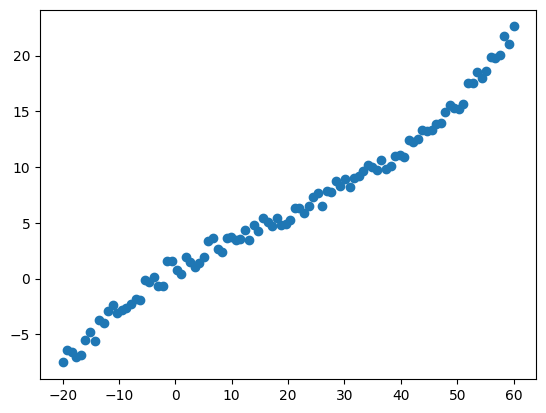

In [ ]:
x=data[:, 0]
y=data[:, 1]
plt.scatter(x,y)
plt.show()

### <a name='1'></a>2. Regresja liniowa jednej zmiennej

### <a name='1-1'></a>2.1 Implementacja funkcji liniowej, kalkulatora kosztów, obranie parametrów sterujących

In [ ]:
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    return np.array([theta_0 + theta_1*xi for xi in x])

In [ ]:
def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    m=x.shape[0]
    fun = h_fun(x, theta_0, theta_1)
    return np.sum((fun-y)**2)/(2*m)



In [ ]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

### <a name='1-2'></a>2.2 Implementacja algorytmu gradientu prostego:


Wykonuj dopóki różnica poprzedniej wartość f. kosztu i obecnej jest większa niż eps
- oblicz wartość pochodnej cząstkowej f. kosztu dla parametru theta_0
- oblicz wartość pochodnej cząstkowej f. kosztu dla parametru theta_1
- zaktualizuj wagę modelu regresji liniowej theta_0 (theta_0 = theta_0 - alpha * gradient_theta_0)
- zaktualizuj wagę modelu regresji liniowej theta_1 (theta_1 = theta_1 - alpha * gradient_theta_1)
- oblicz wartość f. kosztu dla zaktualizowanych wag.

In [ ]:
def descent_gradient(alpha,x,y,theta_0, theta_1,eps):
  condition = True
  th_0, th_1 = theta_0, theta_1
  m = len(x)
  while condition:
    first_cost=calculate_cost(x, y, th_0, th_1)
    gradient_th0= sum(1/m*(h_fun(x,th_0,th_1)-y))
    gradient_th1=sum(1/m*(h_fun(x,th_0,th_1)-y)*x)
    th_0=th_0 -alpha*gradient_th0
    th_1=th_1 -alpha*gradient_th1
    new_cost=calculate_cost(x, y, th_0, th_1)
    condition = (first_cost - new_cost) > eps
  return th_0, th_1



### <a name='1-3'></a>2.3 Policzenie optymalnych parametrów dla regresji liniowej oraz współczynnika kosztu dla tych parametrów

In [ ]:
th_0, th_1 = descent_gradient(alpha,x,y,theta_0, theta_1,eps)
print(th_0)
print(th_1)



0.0064876258457920565
0.31538415538147335


In [ ]:
print(calculate_cost(x, y, th_0,th_1))

0.6391738572130962


### <a name='1-4'></a>2.4 Wizualizacja zoptymalizowanych parametrów regresji liniowej:

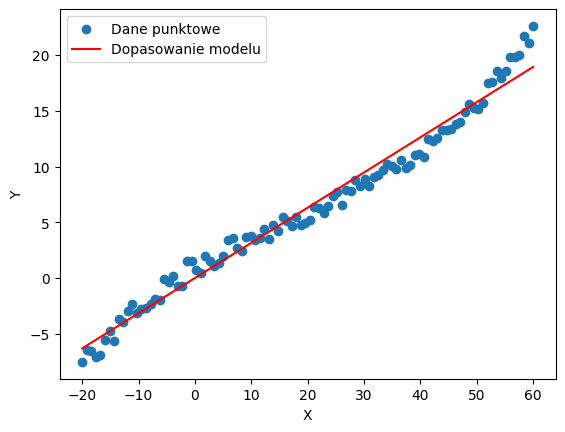

In [ ]:
x=data[:, 0]
y=data[:, 1]

plt.scatter(x,y, label='Dane punktowe')
plt.plot(x,h_fun(x,th_0,th_1), color = 'red', label='Dopasowanie modelu')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### <a name='2'></a>3. Regresja liniowa wielu zmiennych


### <a name='2-1'></a>3.1 Dostosowanie parametrów do operacji macierzowych

In [ ]:
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]
theta = np.array([[0], [0]])

In [ ]:
print(y.shape)
print(X.shape)

(1, 100)
(2, 100)


In [ ]:
print(theta.shape)
print(X.shape)

(2, 1)
(2, 100)


### <a name='2-2'></a>3.2 Dostosowanie implementacji funkcji liniowej, kalkulatora kosztów, algorytmu gradientu prostego do postaci wielowymiarowej regresji liniowej

In [ ]:
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return:
    '''
    return theta.T @ X # przykładowa realizacja, @ - mnożenie macierzowe

def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m=X.shape[1]
    fun = h_fun(X, theta)
    return np.sum((fun-y)**2)/(2*m)

In [ ]:
def descent_gradient(alpha,x,y,theta,eps):
  condition = True
  m =x.shape[1]
  while condition:
    first_cost=calculate_cost(x, y, theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha * gradient.T / m
    new_cost=calculate_cost(x, y, theta)
    condition = (first_cost - new_cost) > eps
  return theta

### <a name='2-3'></a>3.3 Policzenie optymalnych parametrów dla regresji liniowej oraz współczynnika kosztu dla tych parametrów

In [ ]:
theta=descent_gradient(alpha,X,y,theta,eps)
print(theta)

[[0.00648763]
 [0.31538416]]


In [ ]:
calculate_cost(X, y, theta)

0.6391738572130962

### <a name='2-4'></a>3.4 Wizualizacja zoptymalizowanych parametrów regresji liniowej:

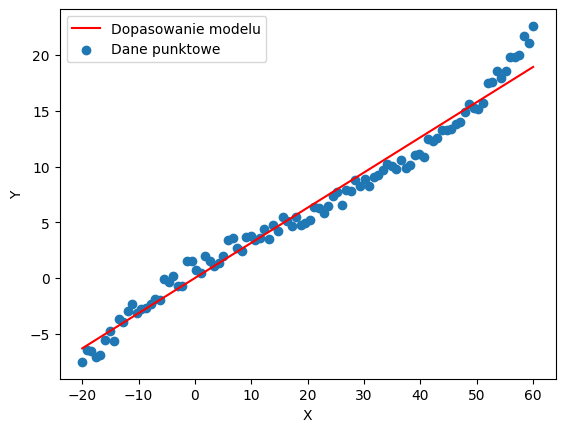

In [ ]:
plt.plot(X[1, :],h_fun(X,theta).flatten(), color = 'red', label='Dopasowanie modelu')
plt.scatter(x,y, label='Dane punktowe')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### <a name='3'></a>4.  Optymalizacja modelu regresji liniowej wielu zmiennych

### <a name='3-1'></a>4.1 Pobranie danych z pliku housing.txt

In [ ]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T


### <a name='3-2'></a>4.2 Standaryzacja zmiennych numerycznych

In [ ]:
y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
theta = np.array([[0], [0], [0]])

### <a name='3-3'></a>4.3 Predykcja kosztu mieszkania 4 pokojowego o powierzchni 1300 $ m^2 $

In [ ]:
example = np.array([[1], [1300], [4]])
theta=descent_gradient(alpha,X,y,theta,eps)

h_example = theta.T @ (example/X_scale) * y_scale
print(f'koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 296090.6397107442


### <a name='4'></a>5. Regresja wielomianowa

### <a name='4-1'></a>5.1 Pobranie danych z pliku measurements.csv

In [232]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
x=data[:, 0]
y=data[:, 1]



### <a name='4-2'></a>5.2 Standaryzacja zmiennych i utworzenie wektora X dla regresji wielomianowej oraz aktualizacja parametrów sterujących

In [233]:
X = np.vstack([np.ones(x.shape), x, x**2, x**3])

In [234]:
X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale

In [235]:
eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

### <a name='4-3'></a>5.3 Policzenie optymalnych parametrów dla regresji wielomianowej

In [236]:
theta=descent_gradient(alpha,X,y,theta,eps)
print(theta)

[[ 0.02528658]
 [ 0.77921902]
 [-0.49718083]
 [ 0.65075679]]


### <a name='4-4'></a> 5.4 Wizualizacja zoptymalizowanych parametrów regresji wielomianowej:

In [237]:
h_fun_z = theta.T @ X * y_scale

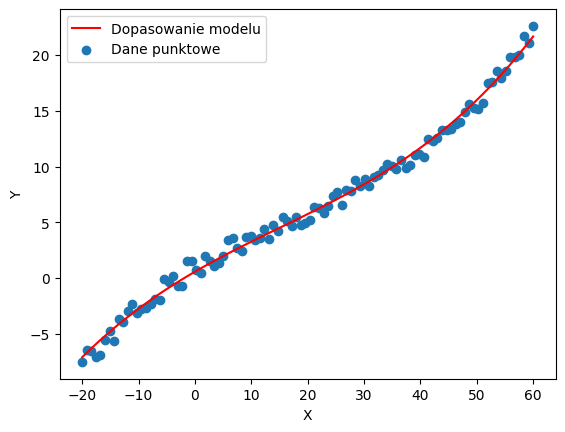

In [244]:

plt.plot(X[1]*X_scale[1],h_fun_z.flatten(), color = 'red', label='Dopasowanie modelu')
plt.scatter(x,y*y_scale, label='Dane punktowe' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
